# Codecademy NBA Trends Project

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


The data has been subsetted for you into two smaller datasets: games from 2010 (named `nba_2010`) and games from 2014 (named `nba_2014`). To start, let’s focus on the 2010 data.

In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [5]:
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [6]:
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


## Analyzing relationships between Quant and Categorical
Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the `pts` column from the `nba_2010` DataFrame, create two series named `knicks_pts` (`fran_id = "Knicks"`) and `nets_pts`(`fran_id = "Nets"`) that represent the points each team has scored in their games.

In [7]:
knicks_pts_2010 = nba_2010.pts[nba_2010.fran_id =='Knicks']
nets_pts_2010 = nba_2010.pts[nba_2010.fran_id =='Nets']

Calculate the difference between the two teams’ average points scored and save the result as `diff_means_2010`. Based on this value, do you think `fran_id` and `pts` are associated? Why or why not?

In [8]:
knicks_mean_score_2010 = np.mean(knicks_pts_2010)
nets_mean_score_2010 = np.mean(nets_pts_2010)

diff_means_2010 = knicks_mean_score_2010 - nets_mean_score_2010
print(diff_means_2010)

9.731707317073173


*I don't know because I don't know if 9.7 is "large" or "small".*

Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

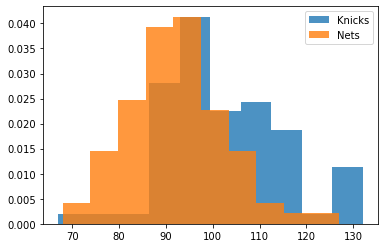

In [9]:
plt.hist(knicks_pts_2010, alpha=0.8, density = True, label='Knicks')
plt.hist(nets_pts_2010, alpha=0.8, density = True, label='Nets')
plt.legend()

plt.show()

*There is a lot of overlap, but the distributions aren't quite the same.  The Knicks tend to score higher than the Nets.  I'd rather see a box plot.*

Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

In [10]:
knicks_pts_2014 = nba_2014.pts[nba_2014.fran_id =='Knicks']
nets_pts_2014 = nba_2014.pts[nba_2014.fran_id =='Nets']

knicks_mean_score_2014 = np.mean(knicks_pts_2014)
nets_mean_score_2014 = np.mean(nets_pts_2014)

diff_means_2014 = knicks_mean_score_2014 - nets_mean_score_2014
print(diff_means_2014)


0.44706798131809933


*The difference in points is much smaller. Does this mean the games were much closer?*

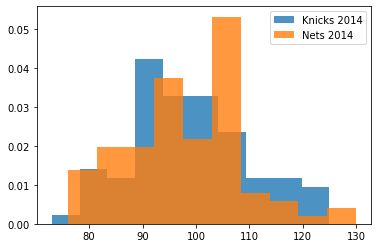

In [11]:
plt.hist(knicks_pts_2014, alpha=0.8, density = True, label='Knicks 2014')
plt.hist(nets_pts_2014, alpha=0.8, density = True, label='Nets 2014')
plt.legend()

plt.show()

*The mean difference I calculated does make sense.  There is much more overlap in the two plots.*

For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using `nba_2010`, generate side-by-side boxplots with points scored (`pts`) on the y-axis and team (`fran_id`) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that `fran_id` and `pts` are associated? Which pairs of teams, if any, earn different average scores per game?


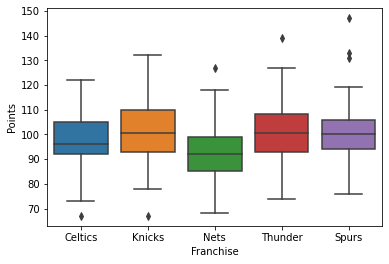

In [12]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.xlabel('Franchise')
plt.ylabel('Points')
plt.show()

*It looks like, in some cases, teams and points are associated. I'm not sure why the question is "pairs of teams". The knicks, Thunder, and Spurs have the higher averages.  They all overlap, though.*

## Analyzing relationships between Categorical variables

The variable `game_result` indicates whether a team won a particular game (`'W'` stands for 'win' and `'L'` stands for 'loss'). The variable `game_location` indicates whether a team was playing at home or away (`'H'` stands for 'home' and `'A'` stands for 'away'). Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of `game_result` and `game_location`.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?


In [13]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)

location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


*They tend to lose the most games away, even more than winning games at home.*

*Are the variables associated? Yes?*

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`. Print your result.

In [14]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


Using the contingency table created in the previous exercise (use the counts – NOT the proportions), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

In [15]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
# chi2, pval, dof, expected = chi2_contingency(location_result_proportions)

print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*The contingency table looks sort of similar, but sort of different.  I'm not sure! I need more math.*

*Using the proportions table from ex 7:
0 says they aren't related?  Is 0 right?  Should this have been the `location_results_freq` instead of proportions?*

*Using the freq:
They don't look related to me, but a chi2 of 6 suggests they are strongly related.  What are we even comparing again?  They tend to win more games at home compared to away.  This doesn't make any sense to me.*

*From solution: For a 2x2 table, Chi-squared greater than about 4 indicates an association. We've exceeded that!*

## Analyzing Relationships Between Quantitative Variables

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points.

In the data, this is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Did teams with a higher probability of winning (according to 538) also tend to win games by more points?

Using `nba_2010`, calculate the covariance between `forecast` (538’s projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset.  Call this `point_diff_forecast_cov`. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [16]:
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)

point_diff_forecast_cov

array([[186.56,   1.37],
       [  1.37,   0.05]])

*Covariance is 1.37. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other.*

Because 538’s `forecast` variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using `nba_2010`, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [20]:
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)

point_diff_forecast_corr

0.44020887084680815

*Value is closer to 1, so highly associated variables with a linear relationship.  but test with a scatter plot!*

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

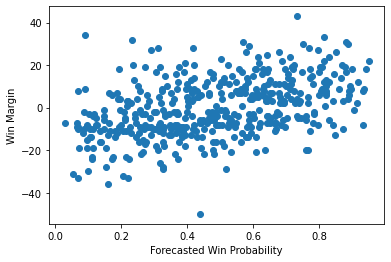

In [19]:
plt.scatter(nba_2010.forecast, nba_2010.point_diff)
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Win Margin')

plt.show()

*There is a linear trend that says the higher the forcasted win probability, the higher the points. Or the other way around.*